# **Graphs**

## **Introduction**

Graphs are used to represent relationships among entities.

Examples:

<ul>
  <li>Facebook
    <ul>
      <li>entities are people</li>
      <li>relationships are "friends" - symmetric relationship: if x is a friend of y, then y is a friend of x</li>
    </ul>
  </li>
    <li>Twitter
    <ul>
      <li>entities are people</li>
      <li>relationships are "follows" - asymmetric relationship: if x follows y, y may or may not follow x</li>
    </ul>
  </li>
</ul>


**Visual Representation**

**Vertices** or **nodes** represent entities – we usually draw them as circles


**Edges** represent relationships – we usually draw them as lines connecting the corresponding vertices

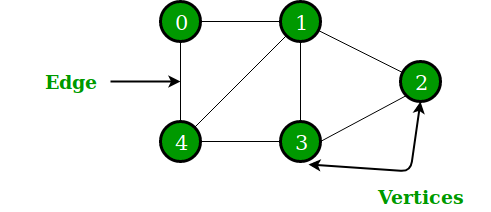

**Directed and undirected graphs**

We represent symmetric relationships with undirected edges (drawn as simple lines)

We represent asymmetric relationships with directed edges (drawn as arrows)

A graph where all edges are undirected is called an **undirected graph**, otherwise it is a **directed graph**

**Weighted and unweighted graphs**

We can assign weights to edges – for example to plan a driving route, vertices would be cities, edges would be roads connecting cities, and weights would be distances or driving times.

A graph where edges have associated weights is called a **weighted graph**, otherwise it is an **unweighted graph**.

An undirected unweighted graph:

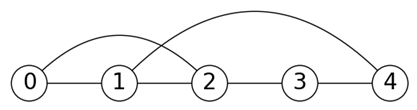

A directed unweighted graph

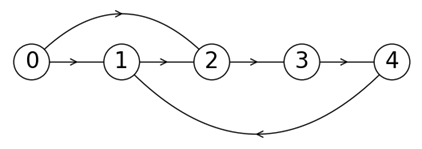

An undirected  weighted graph

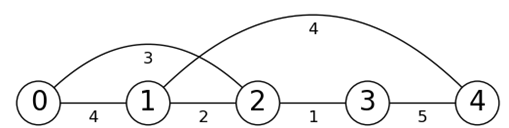

A directed weighted graph

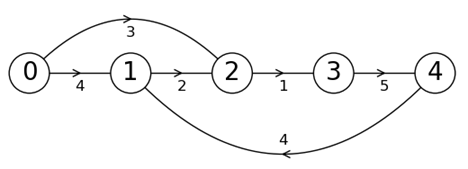

**Some notation:**

Let *G=(V,E)* denote a graph *G* with set of vertices *V* and set of edges *E*.

In this class, we will use the consecutive integers starting at 0 to represent vertices. We can easily add a list or dictionary to map those integers to names of entities in the world.  

By our convention, 

*V={0,1,2,…,|V|-1}*, where *|V|* denotes the cardinality or size of the set of vertices *V*. 

and *E* is a set of pairs *(u,v)* such that *u* and *v* are vertices in *V*. 
If edge *(u,v)* is directed, then *u* is called the *source* and *v* is the *destination* of the *(u,v)*. 



For example, let G=(V,E) be the unweighted undirected graph in the image:

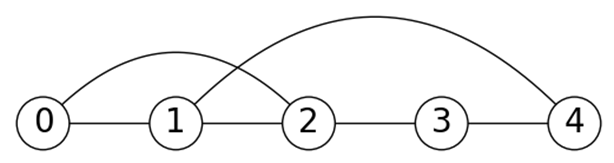

Then:

V = {0,1,2,3,4}

E = {(0,1), (0,2), (1,2), (1,4), (2,3), (3,4)}

V and E are sets, so the order in which we write their elements doesn’t matter.

G is undirected, so the order of the vertices in an edge also doesn’t matter 



Now let’s consider a weighted graph. Now edges are represented by 3 numbers, **(source, destination, weight)**. Notice that in the undirected case source and destination are interchangeable.
Let G=(V,E) be the weighted directed graph in the image

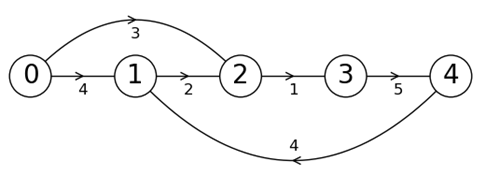


Then:

V = {0,1,2,3,4}

E ={(0,1,4), (0,2,3), (1,2,2), (2,3,1), (3,4,5), (4,1,4)}


**Graph representation:**

How to represent a graph in a way that a computer can analyze and manipulate?

There are three main ways to represent a graph in a programming language:

<ul>
  <li>Adjacency list </li>
  <li>Adjacency matrix</li>
  <li>Edge list</li>
</ul>




## **Graph Representation - Adjacency list**

### **Implementation**

**Idea:** We represent G=(V,E) using a list of lists of length(|V|). The first list contains the edges going out of vertex 0, the second list contains the edges going out of vertex 1, and so on. 

In our implementation, a graph is represented as an object of class **Graph**, which contains as attributes the adjacency list **AL** and boolean variables **weighted** and **directed** indicating whether the graph is weighted and directed, respectively. 

```
class Graph:
    def __init__(self, n, weighted=False, directed=False):
        self.AL = [[] for i in range(n)]
        self.weighted = weighted
        self.directed = directed
```
The constructor receives the number of vertices *n* and optional parameters **weighted** and **directed**, which are False by default, and builds a graph with *n* vertices and no edges. 

In our implementation, edges are represented as  objects of class **Edge**, which contain the **dest**, the edge destination and **weight**, the edge weight or cost. Notice that the edge source is not stored in the object, since it is infered from the index of the list where the edge is. 

```
class Edge:
    def __init__(self, dest, weight=1):
        self.dest = dest
        self.weight = weight
```
By default, weights have a value of 1, which is also the weight for all edges in an unweighted graph. 

To insert an edge to a graph, we create an edge object and insert it to the appropriate list in the adjacency list using the insert method in the Graph object. 

```
def insert_edge(self,source,dest,weight=1):
    self.AL[source].append(Edge(dest,weight))
```




To build the graph below, we would execute the following instructions:

```
g = Graph(5,directed = True)
g.insert_edge(0,1)
g.insert_edge(1,2)
g.insert_edge(2,3)
g.insert_edge(3,4)
g.insert_edge(4,0)
g.draw()
```
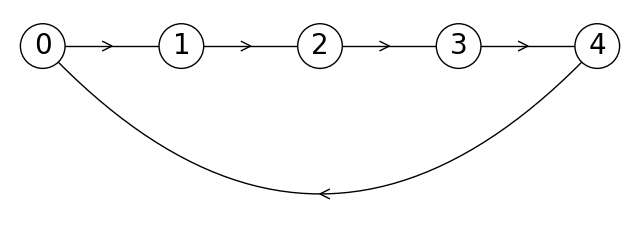


To build the graph below, we would execute the following instructions:

```
    g = Graph(5,weighted=True,directed = True)
    g.insert_edge(0,1,4)
    g.insert_edge(0,2,3)
    g.insert_edge(1,2,2)
    g.insert_edge(2,3,1)
    g.insert_edge(3,4,5)
    g.insert_edge(4,1,4)
```
Notice that insertions can be performed in any order.


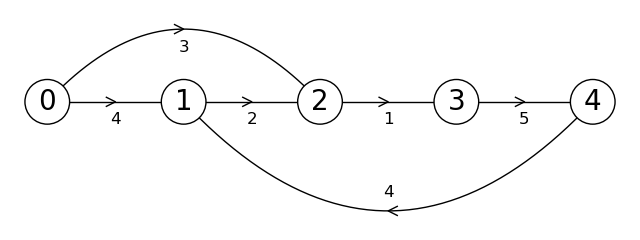

Suppose G is an undirected graph. Should we insert an edge connecting vertices u and v in G.AL[u] or in G.AL[v]? The answer is both. 

Thus we modify the insert method as follows:

```
def insert_edge(self,source,dest,weight=1):
    self.AL[source].append(Edge(dest,weight))
    if not self.directed:
        self.AL[dest].append(Edge(source,weight))
```



To delete an edge (u,v) in an directed graph G, we search for it in list G.AL[u]; if we find it, we delete it. 



```
def delete_edge_directed(self,source,dest):
    for i,edge in enumerate(self.AL[source]):
        if edge.dest == dest:
            self.AL[source].pop(i)

```
To delete an edge (u,v) in an undirected graph G, we delete the directed edges (u,v) and (v,u).  The following code would work for both directed and undirected graphs.

```
def delete_edge(self,source,dest):
    self.delete_edge_directed(source,dest)
    if not self.directed:
      self.delete_edge_directed(dest,source)
```


Finally, the complete implementation, including code to print the structure of a graph, to draw, and to check for the validity of parameters passed is as follows: 

In [1]:
# Adjacency list representation of graphs
# Programmed by Olac Fuentes
# Last modified October 19, 2021
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

class Edge:
    def __init__(self, dest, weight=1):
        self.dest = dest
        self.weight = weight

class Graph:
    # Constructor
    def __init__(self, n, weighted=False, directed = False):
        # T(V,E) = O(|V|) - We create n (or |V|) empty lists
        self.AL = [[] for i in range(n)]
        self.weighted = weighted
        self.directed = directed

    def copy(self):
        # T(V,E) = O(|V|+|E|) - We traverse the whole graph
        # If the graph has less than |V| edges, we still perform |V| steps (the outer loop)
        # Otherwise, we will visit |E| edges
        g_copy = Graph(len(self.AL),self.weighted,self.directed)
        for i in range(len(self.AL)):
            for edge in self.AL[i]:
                 if self.directed or edge.dest>i:
                     g_copy.insert_edge(i,edge.dest,edge.weight)
        return g_copy

    def insert_edge(self,source,dest,weight=1):
        # T(V,E) = O(1) - We append an element to a list
        if source >= len(self.AL) or dest>=len(self.AL) or source <0 or dest<0:
            print('Error, vertex number out of range')
            return False
        elif weight!=1 and not self.weighted:
            print('Error, inserting weighted edge to unweighted graph')
            return False
        else:
            self.AL[source].append(Edge(dest,weight))
            if not self.directed:
                self.AL[dest].append(Edge(source,weight))
            return True

    def delete_edge_directed(self,source,dest):
        # T(V,E) = O(|V|) - We need to traverse the list of edges going out from source, which has length at most |V|-1
        for i,edge in enumerate(self.AL[source]):
            if edge.dest == dest:
                self.AL[source].pop(i)
                return True
        return False

    def delete_edge(self,source,dest):
        # T(V,E) = O(|V|) - We need to traverse the lists of edges going out from source and dest, which have length at most |V|-1
        if source >= len(self.AL) or dest>=len(self.AL) or source <0 or dest<0:
            print('Error, vertex number out of range')
        else:
            deleted = self.delete_edge_directed(source,dest)
            if not self.directed:
                deleted = self.delete_edge_directed(dest,source)
        if not deleted:
            print('Error, edge to delete not found')

    def display(self,name ='Graph'):
        # T(V,E) = O(|V|+|E|) - We traverse the whole graph
        # If the graph has less than |V| edges, we still perform |V| steps (the outer loop)
        # Otherwise, we will visit |E| edges
        print(name+' representation')
        print('directed: {}, weighted: {}'.format(self.directed,self.weighted))
        print('Adjacency list:')
        for i in range(len(self.AL)):
            p=''
            print('AL[{}]=['.format(i),end='')
            for edge in self.AL[i]:
                print(p+'({},{})'.format(edge.dest,edge.weight),end='')
                p=', '
            print(']')

    def draw(self,title=None):
        scale = 30
        r = scale/5
        figsize = [6.4, 2.4]
        if len(self.AL)>8:
            figsize[0] = 6.4*len(self.AL)/8
        fig, ax = plt.subplots(figsize=figsize)
        for i in range(len(self.AL)):
            for edge in self.AL[i]:
                d,w = edge.dest, edge.weight
                if self.directed or d>=i:

                    x0 = np.linspace(i*scale,d*scale,num=5)
                    diff = np.abs(d-i)
                    if diff == 1:
                        y0 = [0,0,0,0,0]
                    else:
                        y0 = [0,-6*diff,-8*diff,-6*diff,0]

                    if  diff==0:
                        x = i*scale + r*np.sin(np.linspace(0,6.3))
                        y = r + r*np.cos(np.linspace(0,6.3))
                        y0 = [0,r,2*r,r,0]
                    else:
                        f = interp1d(x0, y0, kind='cubic')
                        x = np.linspace(i*scale,d*scale)
                        y = f(x)
                    s = np.sign(i-d-1/2)
                    ax.plot(x,s*y,linewidth=1,color='k')
                    if self.directed:
                        xd = [x0[2]+2*s,x0[2],x0[2]+2*s]
                        yd = [y0[2]-1,y0[2],y0[2]+1]
                        yd = [y*s for y in yd]
                        ax.plot(xd,yd,linewidth=1,color='k')
                    if self.weighted:
                        xd = [x0[2]+2*s,x0[2],x0[2]+2*s]
                        yd = [y0[2]-1,y0[2],y0[2]+1]
                        yd = [y*s for y in yd]
                        ax.text(xd[2]-s*3,yd[2]-3*s, str(w), size=12,ha="center", va="center")
            ax.plot([i*scale,i*scale],[0,0],linewidth=3,color='k')
            ax.text(i*scale,0, str(i), size=20,ha="center", va="center",
             bbox=dict(facecolor='w',boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        if title==None:
            plt.tight_layout()
        else:
            fig.suptitle(title, fontsize=14)


**Analyzing graph algorithms.** Since graphs are defined by two sets, U and E, we describe running times of graph algorithms in terms of the sizes of these sets, |V| and |E|, respectively. 

### **Examples**

**Creating a graph, adding and removing edges.**

Code to build an unweighted undirected graph with 5 vertices and no edges.

In [ ]:
g = Graph(5)
g.display()
g.draw()


We can now add a few edges.

In [ ]:
g.insert_edge(0,1)
g.insert_edge(0,2)
g.insert_edge(1,2)
g.insert_edge(2,3)
g.insert_edge(3,4)
g.insert_edge(4,1)
g.display()
g.draw()


We can delete edges.

In [ ]:
g.delete_edge(0,1)
g.delete_edge(4,3)
g.display()
g.draw()

Now let's build a weighted directed graph

In [ ]:
g = Graph(5,weighted=True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(3,4,5)
g.display()
g.draw()


Note that if we don't specify the weight in an edge insertion, it defaults to 1.

In [ ]:
g.insert_edge(2,4)
g.display()
g.draw()

**Example:** Write the function *num_vertices(G)* that receives a graph *G* represented as an adjacency list and returns the number of vertices in *G*. What is the running time of your function with respect to *|V|* and *|E|*? 

In [ ]:
def num_vertices(G):
    # T(n) = O(1)
    return len(G.AL)

In [ ]:
g = Graph(5,weighted=True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(3,4,5)
g.display()
g.draw()
print('The graph has {} vertices'.format(num_vertices(g)))

**Example:** Write the function *num_edges(G)* that receives a graph *G* represented as an adjacency list and returns the number of edges in *G*. What is the running time of your function with respect to *|V|* and *|E|*? 

In [ ]:
def num_edges(G):
    # T(n) = O(|V|)
    edges = 0
    for i in G.AL:
        edges += len(i)
    if not G.directed: # If graph is undirected, each edge is represented twice. 
        edges=  edges//2
    return edges

In [ ]:
g = Graph(5,weighted=True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(3,4,5)
g.insert_edge(2,4)
g.display()
g.draw()
print('The graph has {} edges'.format(num_edges(g)))

In [ ]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
print('The graph has {} edges'.format(num_edges(g)))

**Example:** Write a function sink_grap(n,s) that receives integers n and s and builds a directed graph with n vertices where there is an edge going to s from every vertex in the graph (except for s). 

In [ ]:
def sink_graph(n,s):
    g = Graph(n,directed=True)
    for i in range(n):
        if i!=s:
            g.insert_edge(i,s)
    return g

In [ ]:
g = sink_graph(6,3)
g.display()
g.draw()

### **Exercises**

**Exercise 1:** The out-degree of a vertex v in a directed graph G=(V,E) is the number of edges going out from v in G. Write the function *out_degree(G,v)* that receives a graph G represented as an adjacency list and an integer v and returns the out-degree of vertex v in G. 

In [ ]:
def out_degree(G,v):
    return len(G.AL[v])

In [ ]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for v in range(len(g.AL)):
  print('The out-degree of vertex {} is {}'.format(v, out_degree(g,v)))

**Exercise 2.**	The in-degree of a vertex v in a directed graph G=(V,E) is the number of edges going into v in G. Write the function in_degree(G,v) that receives a graph G represented as an adjacency list and an integer v and returns the in-degree of vertex v in G. 

In [ ]:
def in_degree(G,v):
    count = 0
    for edges in G.AL:
        for edge in edges:
            if edge.dest == v:
                count +=1
    return count
   

In [ ]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for v in range(len(g.AL)):
  print('The in-degree of vertex {} is {}'.format(v, in_degree(g,v)))

**Exercise 3:** Write the function edge_weight(G,u,v) that receives a graph G represented as an adjacency list and integers  u and v and returns the weight (or weight) of the edge going from u to v in G. If there is no edge going from u to v in G, your function should return math.inf. 

In [2]:
def edge_weight(G,u,v):
    for edge in G.AL[u]:
        if edge.dest == v:
            return edge.weight     
    return math.inf
    

Graph representation
directed: True, weighted: True
Adjacency list:
AL[0]=[(1,4), (2,3)]
AL[1]=[(2,2), (3,1)]
AL[2]=[(3,6)]
AL[3]=[]
AL[4]=[(3,1), (2,1)]
The weight of the edge going from 0 to 1 is 4
The weight of the edge going from 2 to 3 is 6
The weight of the edge going from 1 to 4 is inf


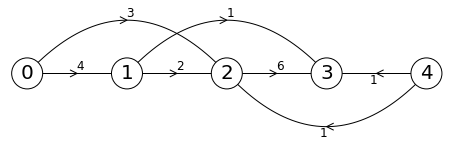

In [3]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for uv in [[0,1], [2,3], [1,4]]:
  print('The weight of the edge going from {} to {} is {}'.format(uv[0], uv[1], edge_weight(g,uv[0], uv[1])))

**Exercise 4:**	Write the function remove_outgoing(G,v) that receives a graph G represented as an adjacency list and an integer v and removes all the edges going out from v in G. 

In [ ]:
def remove_outgoing(G,u):
    G.AL[u] = []   

In [ ]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for v in range(5):
    print('Removing all edges going out from vertex {}'.format(v))
    remove_outgoing(g,v)
    g.display()
    g.draw()
  

## **Graph Representation - Adjacency matrix**

### **Implementation**

To represent a graph G=(V,E) with an adjacency matrix we use a |V|-by-|V| 2D array M defined as follows:

```
if there is an edge going from vertex i to vertex j:
    M[i,j] = weight of edge from i to j
else:
    M[i,j] = -1
```
In our implementation, a graph is represented as an object of class Graph, which contains as attributes the adjacency matrix **AM** and boolean variables **weighted** and **directed** indicating whether the graph is weighted and directed, respectively.


```
class Graph:
    def __init__(self, vertices, weighted=False, directed = False):
        self.AM = np.zeros((vertices,vertices),dtype=int)-1
        self.weighted = weighted
        self.directed = directed
```

To insert an edge given its source, destination, and weight, we simply set the value of AM accordingly. 

```
def insert_edge(self,source,dest,weight=1):
    self.AM[source,dest] = weight
```

In the case of an undirected graph, we also store every edge twice, as done with with adjacency lists. Thus the code is extended to:

```
def insert_edge(self,source,dest,weight=1):
    self.AM[source,dest] = weight
    if not self.directed:
        self.AM[dest,source] = weight
```

To delete an edge given its source, destination, and weight, we simply set the value of the corresponding element in  AM to -1.  


```
def delete_edge(self,source,dest):
    self.AM[source,dest]=-1
    if not self.directed:
        self.AM[dest,source]=-1
```

The complete implementation, including code to print the structure of the graph, to draw it, and to check for the validity of parameters passed is as follows:


In [3]:
# Adjacency matrix representation of graphs
# Programmed by Olac Fuentes
# Last modified October 19, 2021

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

class Graph:
    def __init__(self, vertices, weighted=False, directed = False):
        self.AM = np.zeros((vertices,vertices),dtype=int)-1
        self.weighted = weighted
        self.directed = directed

    def insert_edge(self,source,dest,weight=1):
        if source >= self.AM.shape[0] or dest>=self.AM.shape[1] or source <0 or dest<0:
            print('Error, vertex number out of range')
            return False
        elif weight!=1 and not self.weighted:
            print('Error, inserting weighted edge to unweighted graph')
            return False
        else:
            self.AM[source,dest]=weight
            if not self.directed:
                self.AM[dest,source]=weight
            return True

    def delete_edge(self,source,dest):
        self.AM[source,dest]=-1
        if not self.directed:
            self.AM[dest,source]=-1

    def display(self,name ='Graph'):
        print(name+' representation')
        print('directed: {}, weighted: {}'.format(self.directed,self.weighted))
        print('Adjacency matrix:')
        print(self.AM)

    def draw(self,title=None):
        scale = 30
        figsize = [6.4, 2.4]
        if self.AM.shape[0]>8:
            figsize[0] = 6.4*self.AM.shape[0]/8
        fig, ax = plt.subplots(figsize=figsize)
        for i in range(self.AM.shape[0]):
            for d in range(self.AM.shape[1]):
                w = self.AM[i,d]
                if w>0:
                    if self.directed or d>i:
                        x = np.linspace(i*scale,d*scale)
                        x0 = np.linspace(i*scale,d*scale,num=5)
                        diff = np.abs(d-i)
                        if diff == 1:
                            y0 = [0,0,0,0,0]
                        else:
                            y0 = [0,-6*diff,-8*diff,-6*diff,0]
                        f = interp1d(x0, y0, kind='cubic')
                        y = f(x)
                        s = np.sign(i-d)
                        ax.plot(x,s*y,linewidth=1,color='k')
                        if self.directed:
                            xd = [x0[2]+2*s,x0[2],x0[2]+2*s]
                            yd = [y0[2]-1,y0[2],y0[2]+1]
                            yd = [y*s for y in yd]
                            ax.plot(xd,yd,linewidth=1,color='k')
                        if self.weighted:
                            xd = [x0[2]+2*s,x0[2],x0[2]+2*s]
                            yd = [y0[2]-1,y0[2],y0[2]+1]
                            yd = [y*s for y in yd]
                            #ax.text(xd[2]-s*3,yd[2]-4*s, str(w), size=12,ha="center", va="center")
                            ax.text(xd[2]-s*2,yd[2]+3*s, str(w), size=12,ha="center", va="center")
                ax.plot([i*scale,i*scale],[0,0],linewidth=1,color='k')
                ax.text(i*scale,0, str(i), size=20,ha="center", va="center",
                 bbox=dict(facecolor='w',boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        if title==None:
            plt.tight_layout()
        else:
            fig.suptitle(title, fontsize=14)
       

### **Examples**

Externally, graph operations are identical to those of the adjacency list representation.

Building an unweighted undirected graph:

In [ ]:
g = Graph(5)
g.insert_edge(0,1)
g.insert_edge(0,2)
g.insert_edge(1,2)
g.insert_edge(2,3)
g.insert_edge(3,4)
g.insert_edge(4,1)
g.display()
g.draw()

Deleting an edge from the graph:


In [ ]:
g.delete_edge(1,2)
g.display()
g.draw()

Building an unweighted directed graph:

In [ ]:
g = Graph(5,directed = True)
g.insert_edge(0,1)
g.insert_edge(0,2)
g.insert_edge(1,2)
g.insert_edge(2,3)
g.insert_edge(3,4)
g.insert_edge(4,1)
g.display()
g.draw()

Building a weighted undirected graph:

In [ ]:
g = Graph(5,weighted=True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,1)
g.insert_edge(3,4,5)
g.insert_edge(4,1,4)
g.display()
g.draw()

Building a weighted directed graph:

In [ ]:
g = Graph(5,weighted=True,directed = True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,1)
g.insert_edge(3,4,5)
g.insert_edge(4,1,4)
g.display()
g.draw()

**Example:** Write the function num_vertices(G) that receives a graph G represented as an adjacency matrix and returns the number of vertices in G. What is the running time of your function with respect to |V| and |E|?

In [4]:
def num_vertices(G):
    # T(n) = O(1)
    return G.AM.shape[0]

Graph representation
directed: False, weighted: True
Adjacency matrix:
[[-1  4  3 -1 -1]
 [ 4 -1  2 -1 -1]
 [ 3  2 -1  6 -1]
 [-1 -1  6 -1  5]
 [-1 -1 -1  5 -1]]
The graph has 5 vertices


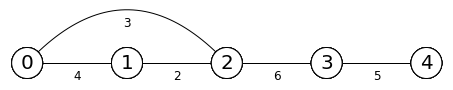

In [5]:
g = Graph(5,weighted=True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(3,4,5)
g.display()
g.draw()
print('The graph has {} vertices'.format(num_vertices(g)))

**Example:** Write the function num_edges(G) that receives a graph G represented as an adjacency matrix and returns the number of edges in G. What is the running time of your function with respect to |V| and |E|?

In [21]:
def num_edges(G):
    # T(n) = O(|V|^2)
    edges = np.sum(G.AM!=-1)
    if not G.directed: # If graph is undirected, each edge is represented twice. 
        edges=  edges//2
    return edges

Graph representation
directed: False, weighted: True
Adjacency matrix:
[[-1  4  3 -1 -1]
 [ 4 -1  2 -1 -1]
 [ 3  2 -1  6  1]
 [-1 -1  6 -1  5]
 [-1 -1  1  5 -1]]
The graph has 6 edges


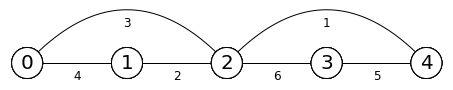

In [22]:
g = Graph(5,weighted=True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(3,4,5)
g.insert_edge(2,4)
g.display()
g.draw()
print('The graph has {} edges'.format(num_edges(g)))

Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1  4  3 -1 -1]
 [-1 -1  2  1 -1]
 [-1 -1 -1  6 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
The graph has 7 edges


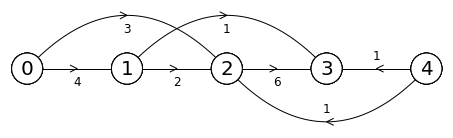

In [11]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
print('The graph has {} edges'.format(num_edges(g)))

**Example:** Write a function sink_grap(n,s) that receives integers n and s and builds a directed graph with n vertices where there is an edge going to s from every vertex in the graph (except for s). 

In this case, it's easier to manipulate the adjacency matrix directly using array slicing, instead of using insert_edge operations. 

In [23]:
def sink_graph(n,s):
    g = Graph(n,directed=True)
    g.AM[:,s] = 1  # Insert edges from every vertex to s
    g.AM[s,s] = -1 # Remove self-edge going from s to s
    return g

Graph representation
directed: True, weighted: False
Adjacency matrix:
[[-1 -1 -1  1 -1 -1]
 [-1 -1 -1  1 -1 -1]
 [-1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1]
 [-1 -1 -1  1 -1 -1]]


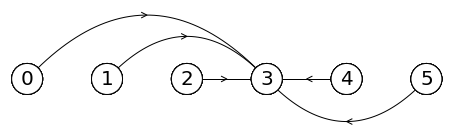

In [24]:
g = sink_graph(6,3)
g.display()
g.draw()

### **Exercises**

**Exercise 1:** The out-degree of a vertex v in a directed graph G=(V,E) is the number of edges going out from v in G. Write the function *out_degree(G,v)* that receives a graph G represented as an adjacency matrix and an integer v and returns the out-degree of vertex v in G. 

In [4]:
def out_degree(G,v):
    # T(V,E) = O(|V|)
    return np.sum(G.AM[v]!=-1)
    

Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1  4  3 -1 -1]
 [-1 -1  2  1 -1]
 [-1 -1 -1  6 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
The out-degree of vertex 0 is 2
The out-degree of vertex 1 is 2
The out-degree of vertex 2 is 1
The out-degree of vertex 3 is 0
The out-degree of vertex 4 is 2


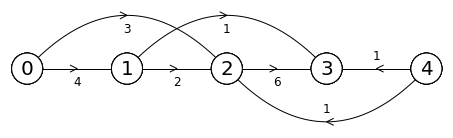

In [5]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for v in range(len(g.AM)):
  print('The out-degree of vertex {} is {}'.format(v, out_degree(g,v)))

**Exercise 2.**	The in-degree of a vertex v in a directed graph G=(V,E) is the number of edges going into v in G. Write the function in_degree(G,v) that receives a graph G represented as an adjacency matrix and an integer v and returns the in-degree of vertex v in G. 

In [6]:
def in_degree(G,v):
    # T(V,E) = O(|V|)
    return np.sum(G.AM[:,v]!=-1)

Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1  4  3 -1 -1]
 [-1 -1  2  1 -1]
 [-1 -1 -1  6 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
The in-degree of vertex 0 is 0
The in-degree of vertex 1 is 1
The in-degree of vertex 2 is 3
The in-degree of vertex 3 is 3
The in-degree of vertex 4 is 0


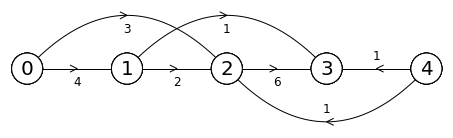

In [7]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for v in range(len(g.AM)):
  print('The in-degree of vertex {} is {}'.format(v, in_degree(g,v)))

**Exercise 3:** Write the function edge_weight(G,u,v) that receives a graph G represented as an adjacency matrix and integers  u and v and returns the weight (or weight) of the edge going from u to v in G. If there is no edge going from u to v in G, your function should return math.inf. 

In [8]:
def edge_weight(G,u,v):
    #  T(V,E) = O(1)
    if G.AM[u,v]==-1:
      return math.inf
    return G.AM[u,v]    

Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1  4  3 -1 -1]
 [-1 -1  2  1 -1]
 [-1 -1 -1  6 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
The weight of the edge going from 0 to 1 is 4
The weight of the edge going from 2 to 3 is 6
The weight of the edge going from 1 to 4 is inf


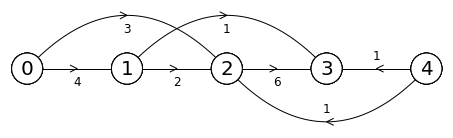

In [9]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for uv in [[0,1], [2,3], [1,4]]:
  print('The weight of the edge going from {} to {} is {}'.format(uv[0], uv[1], edge_weight(g,uv[0], uv[1])))

**Exercise 4:**	Write the function remove_outgoing(G,v) that receives a graph G represented as an adjacency matrix and an integer v and removes all the edges going out from v in G. 

In [10]:
def remove_outgoing(G,u):
    # T(V,E) = O(|V|)
    G.AM[u] = -1 

Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1  4  3 -1 -1]
 [-1 -1  2  1 -1]
 [-1 -1 -1  6 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
Removing all edges going out from vertex 0
Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1 -1 -1 -1 -1]
 [-1 -1  2  1 -1]
 [-1 -1 -1  6 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
Removing all edges going out from vertex 1
Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1  6 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
Removing all edges going out from vertex 2
Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
Removing all edges going out from vertex 3
Graph representation
directed: True, weighted: True
Adjacency matrix:
[[-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1  1 -1]]
Removing all edges goin

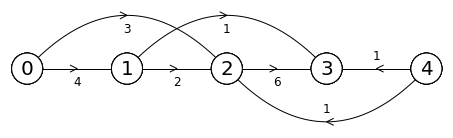

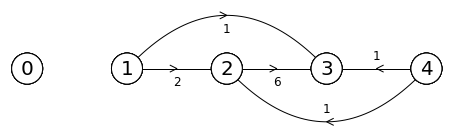

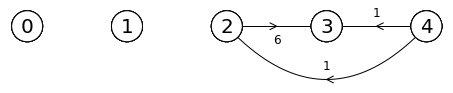

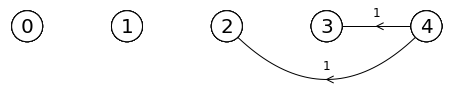

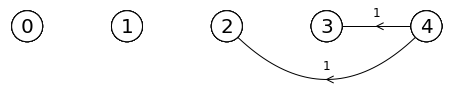

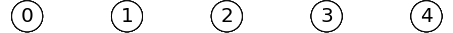

In [11]:
g = Graph(5,weighted=True,directed =True)
g.insert_edge(0,1,4)
g.insert_edge(0,2,3)
g.insert_edge(1,2,2)
g.insert_edge(2,3,6)
g.insert_edge(4,3)
g.insert_edge(4,2)
g.insert_edge(1,3)
g.display()
g.draw()
for v in range(5):
    print('Removing all edges going out from vertex {}'.format(v))
    remove_outgoing(g,v)
    g.display()
    g.draw()